In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
data = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
dfnm = data.select_dtypes(include='number')
dfnm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [3]:
X = dfnm.drop('total_claim_amount', axis=1) # input variable
y = dfnm.total_claim_amount # target variable

In [4]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [5]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
1935,12622,61844,106,19,74,0,2
2181,2808,55005,70,7,39,0,1
6115,2893,30406,73,29,93,0,1


In [6]:
# Scaling
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

LinearRegression: Train -> 0.4088003378941778, Test -> 0.41142812483510915


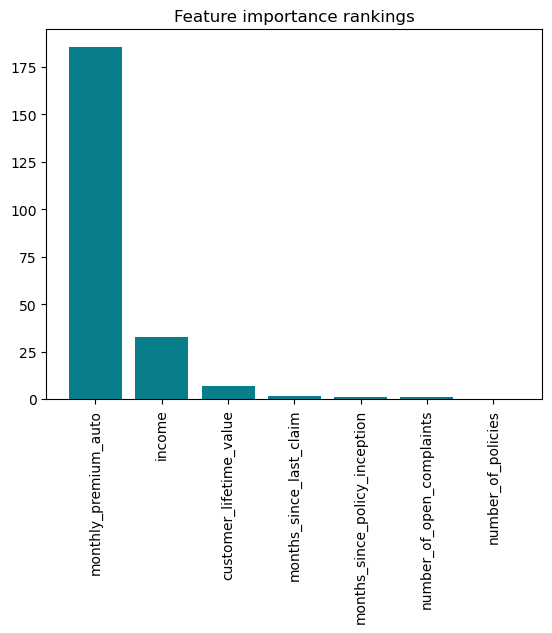

In [22]:
## LINEAR REGRESSION
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

# Model prediction
X_test_scaled = scaler.transform(X_test)
y_test_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_train_pred =  pd.DataFrame(model.predict(X_train_scaled),columns = ['target_d'])

# Model Evaluation: Adjusted R2
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")


# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

# Feature importance plotting
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

Lasso: Train -> 0.4087111017517704, Test -> 0.41150562274446045


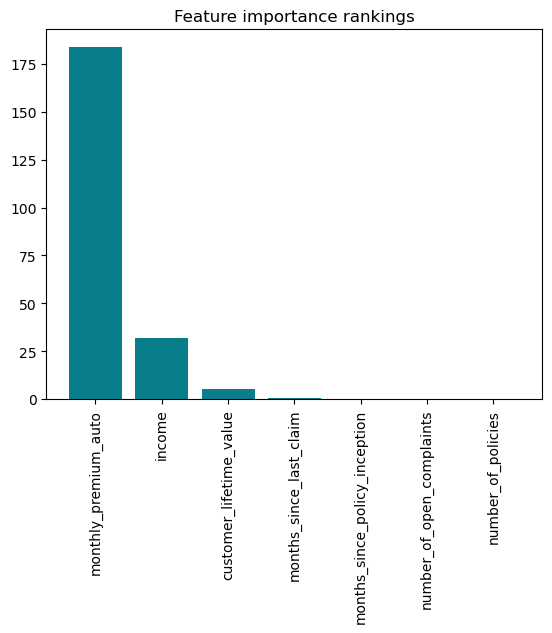

In [29]:
## LINEAR REGRESSION: LASSO
model_lasso=Lasso(alpha=1) # model
model_lasso.fit(X_train_scaled, y_train)   # model train

# Model prediction
X_test_scaled = scaler.transform(X_test)
y_test_pred_lasso = pd.DataFrame(model_lasso.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_train_pred_lasso =  pd.DataFrame(model_lasso.predict(X_train_scaled),columns = ['target_d'])

# Model Evaluation: Adjusted R2
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f"{model_lasso.__class__.__name__}: Train -> {model_lasso.score(X_train_scaled, y_train)}, Test -> {model_lasso.score(X_test_scaled, y_test)}")

# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model_lasso.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

# Feature importance plotting
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

Ridge: Train -> 0.4088003288095051, Test -> 0.4114284690307667


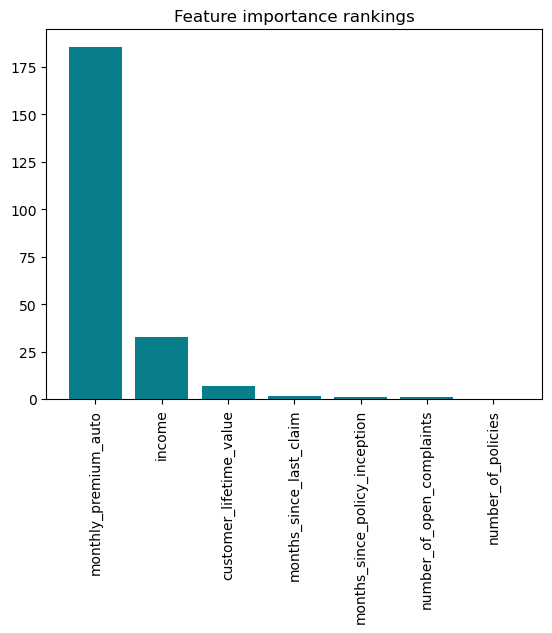

In [30]:
## LINEAR REGRESSION: RIDGE
model_ridge=Ridge(alpha=1) # model
model_ridge.fit(X_train_scaled, y_train)   # model train

# Model prediction
X_test_scaled = scaler.transform(X_test)
y_test_pred_ridge = pd.DataFrame(model_ridge.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_train_pred_ridge =  pd.DataFrame(model_ridge.predict(X_train_scaled),columns = ['target_d'])

# Model Evaluation: Adjusted R2
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f"{model_ridge.__class__.__name__}: Train -> {model_ridge.score(X_train_scaled, y_train)}, Test -> {model_ridge.score(X_test_scaled, y_test)}")

# Feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model_ridge.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

# Feature importance plotting
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
# A function that does linearregression, Lasso and Ridge


def generalregression(input_features, output_features,  alpha_ridge, alpha_lasso):  
    na_idcs = input_features[input_features.isna().any(axis=1)].index
    X = pd.DataFrame(input_features).drop(na_idcs)
    y = pd.DataFrame(output_features).drop(na_idcs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    model=LinearRegression() # model
    model.fit(X_train_scaled, y_train)   # model train
    X_test_scaled = scaler.transform(X_test)
    y_test_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
    y_train_pred =  pd.DataFrame(model.predict(X_train_scaled),columns = ['target_d'])
    Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
    Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

    
    model_ridge=Ridge(alpha_ridge=1) # model
    model_ridge.fit(X_train_scaled, y_train)   # model train
    y_test_pred_ridge = pd.DataFrame(model_ridge.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
    y_train_pred_ridge =  pd.DataFrame(model_ridge.predict(X_train_scaled),columns = ['target_d'])
    Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
    Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print(f"{model_ridge.__class__.__name__}: Train -> {model_ridge.score(X_train_scaled, y_train)}, Test -> {model_ridge.score(X_test_scaled, y_test)}")

    
    model_lasso=Lasso(alpha_lasso=1) # model
    model_lasso.fit(X_train_scaled, y_train)   # model train
    y_test_pred_lasso = pd.DataFrame(model_lasso.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
    y_train_pred_lasso =  pd.DataFrame(model_lasso.predict(X_train_scaled),columns = ['target_d'])
    Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # len(y_test) = number of samples for the test set, X_test.shape[1] = the number of independent variables for the test set
    Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print(f"{model_lasso.__class__.__name__}: Train -> {model_lasso.score(X_train_scaled, y_train)}, Test -> {model_lasso.score(X_test_scaled, y_test)}")


In [37]:
generalregression(X,y, alpha_ridge=1, alpha_lasso=10)
#X = dfnm.drop('total_claim_amount', axis=1) # input variable
#y = dfnm.total_claim_amount # target variable

LinearRegression: Train -> 0.4088003378941778, Test -> 0.41142812483510915


TypeError: __init__() got an unexpected keyword argument 'alpha_ridge'